# Logistic Regression: Analysis of German Credit Data

**Logistic regression: ** is a regression model where the dependent variable is categorical. It is a case of a binary dependent variable, where the output can take only two values, "0" and "1", which represent outcomes such as pass/fail, win/lose, alive/dead or healthy/sick. In the terminology of economics, logistic regression is an example of a qualitative response/discrete choice model.

In [1]:
import math
import numpy as np
import pandas as pd
from datetime import datetime

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
plt.style.use('seaborn-whitegrid')

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import statsmodels.api as sm

C:\Users\rohit\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


# Get the Data

In [2]:
df = pd.read_csv('00 df.csv',sep=',')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
Creditability         1000 non-null int64
Acc_Bal_bin           1000 non-null object
Pay_Status_bin        1000 non-null object
Value_SavStock_bin    1000 non-null object
Length_Emp_bin        1000 non-null object
S&M_Status_bin        1000 non-null object
No_of_Credits_bin     1000 non-null object
Co_Credits_bin        1000 non-null object
Purpose_bin           1000 non-null object
Telephone_bin         1000 non-null object
Instalment_bin        1000 non-null object
Apartment_bin         1000 non-null object
Most_Val_Asset_bin    1000 non-null object
Duration_Credit       1000 non-null int64
Credit_Amount         1000 non-null int64
Age_bin               1000 non-null object
dtypes: int64(3), object(13)
memory usage: 125.1+ KB


# LOGREG - Building the Model

In [3]:
df.drop(['Most_Val_Asset_bin','Age_bin','No_of_Credits_bin','Instalment_bin','Credit_Amount','Telephone_bin',
         'Co_Credits_bin','Apartment_bin'],axis=1,inplace=True)

In [4]:
cat_feats = ['Acc_Bal_bin','Pay_Status_bin','Value_SavStock_bin','Length_Emp_bin','S&M_Status_bin','Purpose_bin']
final_data = pd.get_dummies(df,columns=cat_feats,drop_first=True)
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
Creditability                           1000 non-null int64
Duration_Credit                         1000 non-null int64
Acc_Bal_bin_b. no balance               1000 non-null uint8
Acc_Bal_bin_c. some balance             1000 non-null uint8
Pay_Status_bin_b. paid up               1000 non-null uint8
Pay_Status_bin_c. no problem            1000 non-null uint8
Value_SavStock_bin_b. >= 100 DM         1000 non-null uint8
Length_Emp_bin_b. [1-4) years           1000 non-null uint8
Length_Emp_bin_c. above 4 years         1000 non-null uint8
S&M_Status_bin_b. M mar, M wid, F       1000 non-null uint8
Purpose_bin_b. new car, home related    1000 non-null uint8
dtypes: int64(2), uint8(9)
memory usage: 24.5 KB


In [5]:
x = final_data.drop(['Creditability'],axis=1)
y = final_data['Creditability']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=101)

In [6]:
x_train = sm.add_constant(x_train).copy()
logit = sm.Logit(y_train, x_train)
model = logit.fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.494550
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          Creditability   No. Observations:                  700
Model:                          Logit   Df Residuals:                      689
Method:                           MLE   Df Model:                           10
Date:                Wed, 13 Dec 2017   Pseudo R-squ.:                  0.1904
Time:                        01:28:07   Log-Likelihood:                -346.19
converged:                       True   LL-Null:                       -427.61
                                        LLR p-value:                 8.398e-30
========================================================================================================
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                   -0.6509      0.403     -1.615      0.106      -1.441       0.139
Duration_Credit                         -0.0452      0.008     -5.634      0.000      -0.061      -0.030
Acc_Bal_bin_b. no balance                0.5210      0.230      2.270      0.023       0.071       0.971
Acc_Bal_bin_c. some balance              1.3900      0.234      5.952      0.000       0.932       1.848
Pay_Status_bin_b. paid up                0.5800      0.322      1.799      0.072      -0.052       1.212
Pay_Status_bin_c. no problem             1.0361      0.336      3.081      0.002       0.377       1.695
Value_SavStock_bin_b. >= 100 DM          0.9075      0.241      3.760      0.000       0.434       1.381
Length_Emp_bin_b. [1-4) years            0.4091      0.237      1.727      0.084      -0.055       0.873
Length_Emp_bin_c. above 4 years          0.7762      0.243      3.194      0.001       0.300       1.252
S&M_Status_bin_b. M mar, M wid, F        0.4241      0.197      2.147      0.032       0.037       0.811
Purpose_bin_b. new car, home related     0.4483      0.194      2.308      0.021       0.068       0.829
========================================================================================================
"""

# LOGREG - Predictions and Evaluation

In [10]:
x_test = sm.add_constant(x_test).copy()
y_pred = model.predict(x_test)

x_test = x_test.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)
test_calc = pd.concat([x_test,y_test,pd.DataFrame(y_pred)],axis=1)
test_calc.rename(columns={0: 'predicted'}, inplace=True)

max f:  0.55
max a:  0.55


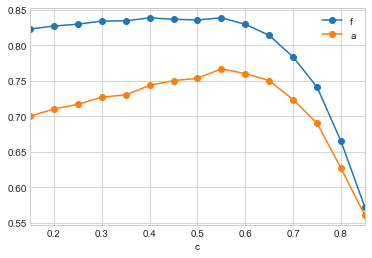

In [11]:
c = [0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85]
a = [0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85]
p = [0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85]
r = [0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85]
f = [0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85]
i = 0

for j in c:
    def flag(cols):
        x = cols[0]
        j = cols[1]
        if x > j: return 1
        else: return 0
    test_calc['j']=j
    test_calc['flag'] = test_calc[['predicted','j']].apply(flag,axis=1)
    df_table = confusion_matrix(test_calc['Creditability'],test_calc['flag'])
    a[i] = (df_table[0,0] + df_table[1,1]) / (df_table[0,0] + df_table[0,1] + df_table[1,0] + df_table[1,1])
    p[i] = df_table[1,1] / (df_table[1,1] + df_table[0,1])
    r[i] = df_table[1,1] / (df_table[1,1] + df_table[1,0])
    f[i] = (2 * p[i] * r[i]) / (p[i] + r[i])
    i = i+1

df_decision = pd.concat([pd.DataFrame(c),pd.DataFrame(a),pd.DataFrame(p),pd.DataFrame(r),pd.DataFrame(f)],axis=1)
df_decision.columns = ['c','a','p','r','f']

f_max = df_decision[df_decision['f']==df_decision['f'].max()].head(1)
max_f = float(f_max['c'])
a_max = df_decision[df_decision['a']==df_decision['a'].max()].head(1)
max_a = float(a_max['c'])

df_decision.plot(x='c',y=['f','a'],marker="o")

print ("max f: ",max_f)
print ("max a: ",max_a)

In [18]:
y_pred = model.predict(x_test)
test_calc = pd.concat([pd.DataFrame(y_test),pd.DataFrame(y_pred)],axis=1)
test_calc.rename(columns={0: 'predicted'}, inplace=True)
test_calc['predicted'] = test_calc['predicted'].apply(lambda x: 1 if x > 0.55 else 0)

print('\033[1m' + '\033[4m' + 'accuracy' + '\033[0m')
print(round(np.mean(test_calc['Creditability']==test_calc['predicted'])*100,2),"%")
print('\n')
print('\033[1m' + '\033[4m' + 'classification_report' + '\033[0m')
print(classification_report(test_calc['Creditability'],test_calc['predicted']))
print('\n')
print('\033[1m' + '\033[4m' + 'confusion_matrix' + '\033[0m')
print(confusion_matrix(test_calc['Creditability'],test_calc['predicted']))

accuracy
76.67 %


classification_report
             precision    recall  f1-score   support

          0       0.63      0.53      0.58        90
          1       0.81      0.87      0.84       210

avg / total       0.76      0.77      0.76       300



confusion_matrix
[[ 48  42]
 [ 28 182]]


# Cost-Profit Consideration

###### Ultimately these statistical decisions must be translated into profit consideration for the bank. Let us assume that a correct decision of the bank would result in 35% profit at the end of 5 years. A correct decision here means that the bank predicts an application to be good or credit-worthy and it actually turns out to be credit worthy. When the opposite is true, i.e. bank predicts the application to be good but it turns out to be bad credit, then the loss is 100%. If the bank predicts an application to be non-creditworthy, then loan facility is not extended to that applicant and bank does not incur any loss (opportunity loss is not considered here). The cost matrix, therefore, is as follows:

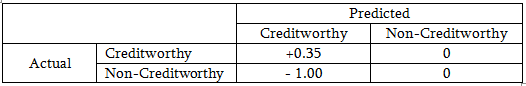

In [19]:
df_table = confusion_matrix(test_calc['Creditability'],test_calc['predicted'])
anc_pnc = df_table[0,0]
anc_pc = df_table[0,1]
ac_pnc = df_table[1,0]
ac_pc = df_table[1,1]

print("profit: ",(-1 * anc_pc + 0.35 * ac_pc))

profit:  21.7
